## scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]   # 先处理二分类问题，选取两个维度的特征以方便可视化    
y = y[y<2] 

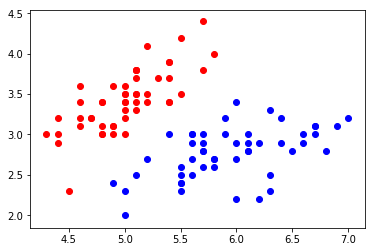

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()  #在使用SVM之前，要对数据进行标准化处理（因为涉及距离的计算）
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC  # SVC指的是support vector classifier

svc = LinearSVC(C=1e9)  # C取值越大，对ξ约束越强，趋向hard margin svm
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

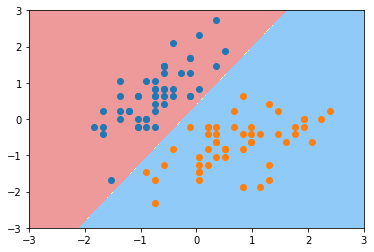

In [6]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [7]:
svc2 = LinearSVC(C=0.01)  # C取值越小，容错空间越大，趋向soft margin svm
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

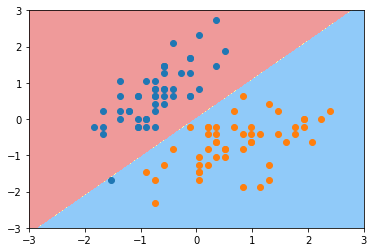

In [8]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [9]:
# w.T.dot(X) + b = 0  超平面,  coef:w  intercept:b
svc.coef_, svc.intercept_

(array([[ 4.03242033, -2.50699749]]), array([0.92736826]))

In [10]:
svc.intercept_

array([0.92736826])

In [11]:
from algorithm.plot_decision_boundary import plot_svc_decision_boundary

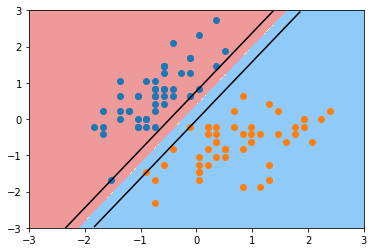

In [12]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

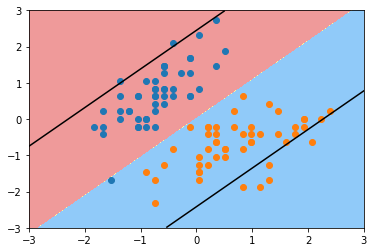

In [13]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

## SVM中使用多项式特征（解决非线性分类）

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [19]:
from sklearn import datasets

X, y = datasets.make_moons()

In [20]:
X.shape, y.shape

((100, 2), (100,))

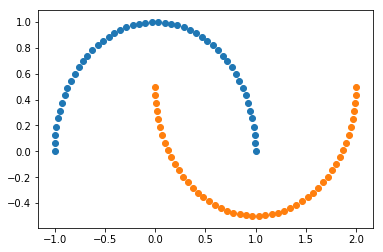

In [21]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

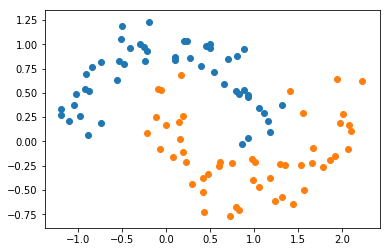

In [22]:
X, y = datasets.make_moons(noise=0.15, random_state=666)   #自动生成非线性数据,并引入噪音

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式特征的SVM

In [28]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [29]:
poly_svc = PolynomialSVC(3)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

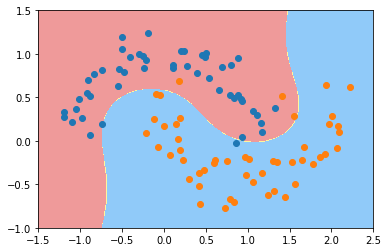

In [33]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

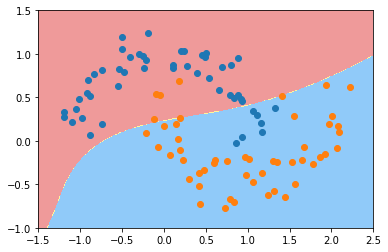

In [74]:
poly_svc2 = PolynomialSVC(3, 0.01)  # C取值越小，对ξ的约束越弱，容错空间越大，趋向 soft margin SVM
poly_svc2.fit(X, y)
plot_decision_boundary(poly_svc2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

### 使用多项式核函数的SVM¶

In [49]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel='poly', degree=degree, C=C))
    ])

In [50]:
poly_kernel_svc = PolynomialKernelSVC(3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

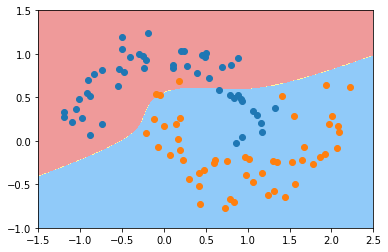

In [51]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

## 直观理解高斯核函数

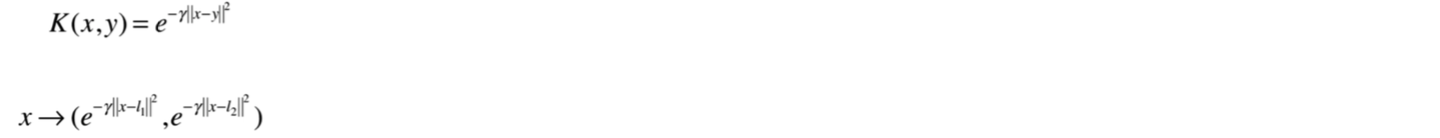

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [53]:
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [54]:
y = np.array((x >= -2) & (x <= 2), dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

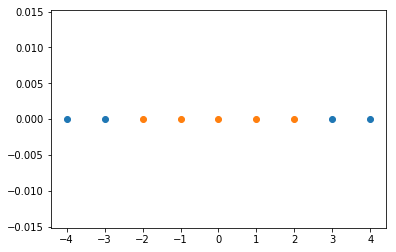

In [57]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))

In [58]:
def gaussian(x, l): #高斯核函数
    gamma = 1.0     #gamma也是个超参数，这里先取1.0  
    return np.exp(-gamma * (x-l)**2)

In [60]:
l1, l2 = -1, 1    #选取l(landmar)的值，这样样本就会被映射到2维空间（维数=l的个数，在svm中为len(x)）

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

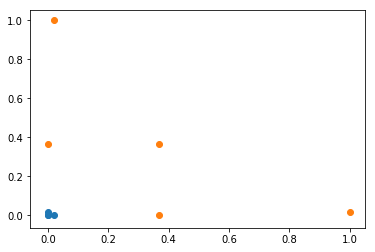

In [61]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1] )
plt.scatter(X_new[y==1, 0], X_new[y==1, 1] )

### scikit-learn中的RBF核

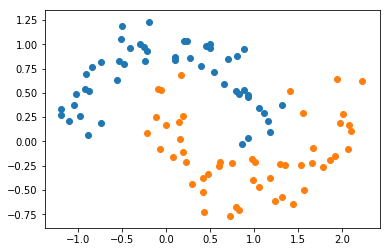

In [62]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma)) #使用高斯核函数，并传入参数γ
    ])

In [67]:
svc = RBFKernelSVC(1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

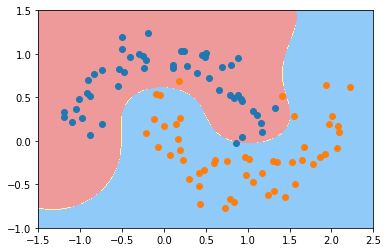

In [70]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

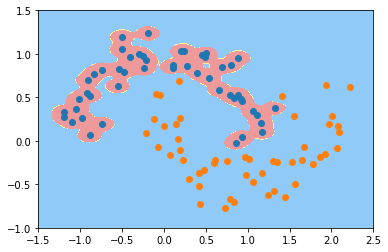

In [71]:
# gamma越大，高斯分布（钟形图）越窄 —— 想象成（钟形图）俯视图 
svc_gamma100 = RBFKernelSVC(100)
svc_gamma100.fit(X, y)
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

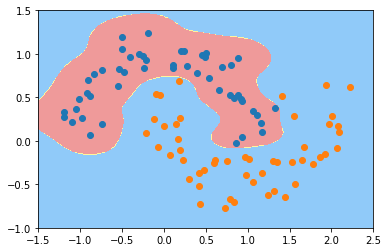

In [72]:
svc_gamma10 = RBFKernelSVC(10)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

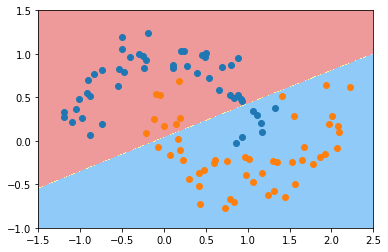

In [75]:
# gamma越小，高斯分布越平均，映射区分能力越弱，退化为线性
svc_gamma001 = RBFKernelSVC(0.01)
svc_gamma001.fit(X, y)
plot_decision_boundary(svc_gamma001, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## SVM思想解决回归问题

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [115]:
from sklearn.svm import LinearSVR    # SVC指的是support vector regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVR", LinearSVR(epsilon=epsilon, C=C))
    ])

In [116]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [117]:
svr.score(X_test, y_test)

0.6356989123980322

In [118]:
def RBFKernelSVR(epsilon=0.1, gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svR", SVR(kernel="rbf",epsilon=epsilon, gamma=gamma)) #使用高斯核函数，并传入参数γ
    ])

In [119]:
svr_gamma1 = RBFKernelSVR(epsilon=1)
svr_gamma1.fit(X_train, y_train)
svr_gamma1.score(X_test, y_test)

0.22694487106786998

In [120]:
svr_gamma01 = RBFKernelSVR(gamma=0.1)
svr_gamma01.fit(X_train, y_train)
svr_gamma01.score(X_test, y_test)

0.6762372367717304